In [1]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

# new import statements
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer

import numpy as np

# use "text" or "diagram" to set the html display of sklearn models
sklearn.set_config(display="diagram")

# Regression 2

### Lake Michigan Waves

Source: https://data.cityofchicago.org/Parks-Recreation/Beach-Water-Quality-Automated-Sensors/qmqz-2xku

In [2]:
df = pd.read_csv("waves.csv")
df.head()

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Transducer Depth,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
0,Calumet Beach,04/07/2018 12:30:00 AM,21.7,3.15,NaN,0.389,3.0,0.0,04/07/2018 12:30 AM,CalumetBeach201804072430
1,Ohio Street Beach,06/14/2019 07:00:00 PM,16.0,2.18,NaN,0.137,3.0,11.8,06/14/2019 7:00 PM,OhioStreetBeach201906141900
2,Ohio Street Beach,05/16/2018 01:00:00 PM,21.7,1.92,NaN,0.023,1.0,10.3,05/16/2018 1:00 PM,OhioStreetBeach201805161300
3,Ohio Street Beach,05/16/2018 02:00:00 PM,21.9,1.81,NaN,0.026,6.0,10.3,05/16/2018 2:00 PM,OhioStreetBeach201805161400
4,Ohio Street Beach,06/04/2018 09:00:00 AM,23.0,0.03,NaN,0.021,8.0,12.4,06/04/2018 9:00 AM,OhioStreetBeach201806040900


In [3]:
df.???

Index(['Beach Name', 'Measurement Timestamp', 'Water Temperature', 'Turbidity',
       'Transducer Depth', 'Wave Height', 'Wave Period', 'Battery Life',
       'Measurement Timestamp Label', 'Measurement ID'],
      dtype='object')

#### Remove missing values

In [4]:
df["Wave Period"].???

 3.0         16244
 4.0         10235
 2.0          4268
 5.0          3547
 6.0          2447
 7.0          1472
 8.0           694
-100000.0      651
 9.0           568
 10.0          294
 1.0            60
Name: Wave Period, dtype: int64

In [5]:
df["Wave Height"].value_counts()

 0.187        2835
-99999.992     651
 0.105         279
 0.110         277
 0.109         277
              ... 
 0.637           1
 0.019           1
 0.704           1
 0.651           1
 0.658           1
Name: Wave Height, Length: 615, dtype: int64

In [6]:
df = ???

#### Can we predict wave height based on wave period (time between waves)?

<AxesSubplot:xlabel='Wave Period', ylabel='Wave Height'>

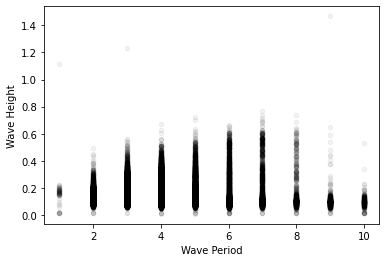

In [7]:
df.plot.scatter(???)

Observation: non-linear relationship => fitting straight line will not work.

#### Can we predict wave height based on beach name and wave period?

In [8]:
beach_names = ???
beach_names

['63rd Street Beach',
 'Calumet Beach',
 'Montrose Beach',
 'Ohio Street Beach',
 'Osterman Beach',
 'Rainbow Beach']

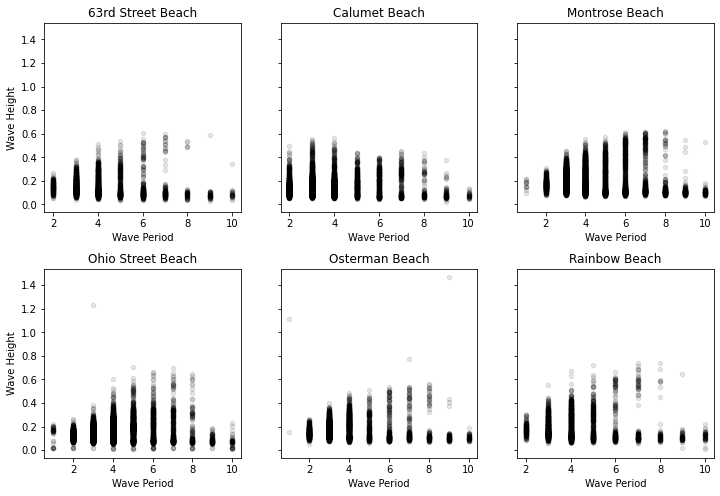

In [9]:
fig, axes = plt.subplots(???, figsize=(12, 8), ???)
plt.subplots_adjust(hspace=0.3)
axes = list(axes.reshape(-1))
???:
    ax = axes.pop(0)
    ax.???
    beach_df = ???
    beach_df.plot.scatter(x="Wave Period", y="Wave Height", 
                          color="k", alpha=0.1, ???)


Obversation: which beach (categorical feature) is important.

### Four Models

1. wave period (linear)
2. wave period (polynomial)
3. beach
4. beach and wave period

`train_test_split(<dataframe>, random_state=<some number>)`
- `random_state` enables us to control the randomization
- when we pass the same number, we will get the same training and test data (psuedo randomization)

In [10]:
train, test = ???
train.head()

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Transducer Depth,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
28830,Ohio Street Beach,07/04/2019 04:00:00 PM,21.5,0.94,NaN,0.137,4.0,11.8,07/04/2019 4:00 PM,OhioStreetBeach201907041600
13175,Calumet Beach,08/07/2016 04:00:00 PM,25.5,0.67,NaN,0.253,2.0,9.8,08/07/2016 4:00 PM,CalumetBeach201608071600
13123,Calumet Beach,08/05/2016 11:00:00 AM,24.1,1.03,NaN,0.173,3.0,10.1,08/05/2016 11:00 AM,CalumetBeach201608051100
23551,Ohio Street Beach,06/15/2015 08:00:00 AM,18.0,1.25,NaN,0.066,4.0,11.9,06/15/2015 8:00 AM,OhioStreetBeach201506150800
30655,Ohio Street Beach,07/29/2017 07:00:00 PM,23.4,3.80,NaN,0.187,3.0,11.5,07/29/2017 7:00 PM,OhioStreetBeach201707291900


#### Model 1: Wave Period (Linear)

`cross_val_score(estimator, X, y, cv=<number>)`
- `cv` enables us mention how many folds we want for the cross-validation

In [11]:
xcols = ???
ycol = ???

m1 = ???
scores = ???
scores

array([0.00454499, 0.00482062, 0.00061888, 0.00133774, 0.00212657,
       0.0045607 , 0.00502461, 0.00087125, 0.00324929, 0.00139911])

In [12]:
scores.???

0.002855376036731605

We want the mean score to be large.

In [13]:
scores.???

0.0016846248473168155

We want the standard deviation to be small, to make sure that our model isn't too sensitive to changes in training and test data.

#### Model 2: Wave Period (Polynomial)

LinearRegression can do this:

```
y = 3*x1 + 5*x2
```
It CANNOT do this:
```
y = 3*x + 5*x^2
```
TRICK:
```
x1 = x
x2 = x^2
```

In [14]:
# Let's make a copy before we add new columns
# Recommendation: don't change the data referred to by a specific variable 
# throughout your code

train2 = ???
train2.head()

,Wave Period
28830,4.0
13175,2.0
13123,3.0
23551,4.0
30655,3.0


Manually adding columns for x^2, x^3, etc.,

In [15]:
???
???
???
train2.head()

,Wave Period,Wave Period ^ 2,Wave Period ^ 3,sqrt(Wave Period
28830,4.0,16.0,64.0,2.000000
13175,2.0,4.0,8.0,1.414214
13123,3.0,9.0,27.0,1.732051
23551,4.0,16.0,64.0,2.000000
30655,3.0,9.0,27.0,1.732051


#### `PolynomialFeatures(degree=<val>, include_bias=False)`

- `degree` enables us to mention how many degrees we need
- `include_bias` default value is True, which will add a column of 1s - we typically don't use that.
- returns an object instance on which we can invoke `fit` and `transform`:
    - `transform(X, columns=<col names>)`: transform data to polynomial features`
    - `fit_transform(X[, y])`: fit to data, then transform it.
- documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [16]:
pf = ???
pf

PolynomialFeatures(degree=4, include_bias=False)

In [17]:
# Fit the data
???
# Transform the data
???

array([[4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       ...,
       [4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03]])

In [18]:
# Convert result of transformation into a DataFrame - step 1
pd.DataFrame(pf.transform(train[xcols]))

,0,1,2,3
0,4.0,16.0,64.0,256.0
1,2.0,4.0,8.0,16.0
2,3.0,9.0,27.0,81.0
3,4.0,16.0,64.0,256.0
4,3.0,9.0,27.0,81.0
...,...,...,...,...
29866,3.0,9.0,27.0,81.0
29867,5.0,25.0,125.0,625.0
29868,4.0,16.0,64.0,256.0
29869,4.0,16.0,64.0,256.0


How can we add meaningful column names? `pf.get_feature_names_out()`

In [19]:
pf.???

array(['Wave Period', 'Wave Period^2', 'Wave Period^3', 'Wave Period^4'],
      dtype=object)

In [20]:
# Convert result of transformation into a DataFrame - step 2
pd.DataFrame(pf.transform(train[xcols]), ???)

,Wave Period,Wave Period^2,Wave Period^3,Wave Period^4
0,4.0,16.0,64.0,256.0
1,2.0,4.0,8.0,16.0
2,3.0,9.0,27.0,81.0
3,4.0,16.0,64.0,256.0
4,3.0,9.0,27.0,81.0
...,...,...,...,...
29866,3.0,9.0,27.0,81.0
29867,5.0,25.0,125.0,625.0
29868,4.0,16.0,64.0,256.0
29869,4.0,16.0,64.0,256.0


In [21]:
# Putting all the steps together
pf = PolynomialFeatures(degree=4, include_bias=False)
pf.fit(train[xcols])
pd.DataFrame(pf.transform(train[xcols]), columns=pf.get_feature_names_out()).head()

,Wave Period,Wave Period^2,Wave Period^3,Wave Period^4
0,4.0,16.0,64.0,256.0
1,2.0,4.0,8.0,16.0
2,3.0,9.0,27.0,81.0
3,4.0,16.0,64.0,256.0
4,3.0,9.0,27.0,81.0


`fit_transform(X[, y])`: fit to data, then transform it.

In [22]:
new_data = pf.???
pd.DataFrame(new_data, columns=pf.get_feature_names_out()).head()

,Wave Period,Wave Period^2,Wave Period^3,Wave Period^4
0,4.0,16.0,64.0,256.0
1,2.0,4.0,8.0,16.0
2,3.0,9.0,27.0,81.0
3,4.0,16.0,64.0,256.0
4,3.0,9.0,27.0,81.0


#### `Pipeline(...)`

- Argument: list of steps in the pipeline:
    - each step represented as a tuple with name of the step and the object instance
    - last step will be the estimator
- documention: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

In [23]:
m2 = ???
m2

Pipeline(steps=[('pf', PolynomialFeatures(include_bias=False)),
                ('lr', LinearRegression())])

In [24]:
scores = ???
scores.???

0.04899677725538595

**Conclusion:** mean R^2 score increased from 0.0029 (linear model) to 0.0489 (polynomial) - not bad!

#### Model 3: Beach Name (Categorical)

In [25]:
train["Beach Name"].???

array(['Ohio Street Beach', 'Calumet Beach', 'Rainbow Beach',
       'Osterman Beach', '63rd Street Beach', 'Montrose Beach'],
      dtype=object)

Naive way of assigning numerial values to a categorical column:
- `Ohio Street Beach`: 1
- `Calumet Beach`: 2
- `Rainbow Beach`: 3, etc.,
- Problem: `Calumet Beach` will become an average of `Ohio Street Beach` and `Rainbow Beach` => this doesn't make any sense!

#### `OneHotEncoder()`

- encodes categorical features as a one-hot numeric array
- returns a "sparse matrix", which needs to be explicitly converted into an `array` using `to_array()` method, before `DataFrame` conversion
- documention: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [26]:
xcols = ???

In [27]:
oh = ???

<29871x6 sparse matrix of type '<class 'numpy.float64'>'
	with 29871 stored elements in Compressed Sparse Row format>

In [28]:
oh.???

<29871x6 sparse matrix of type '<class 'numpy.float64'>'
	with 29871 stored elements in Compressed Sparse Row format>

In [29]:
# All steps
oh = OneHotEncoder()
pd.DataFrame(oh.???, columns=oh.get_feature_names_out())

,Beach Name_63rd Street Beach,Beach Name_Calumet Beach,Beach Name_Montrose Beach,Beach Name_Ohio Street Beach,Beach Name_Osterman Beach,Beach Name_Rainbow Beach
0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
29866,0.0,0.0,0.0,0.0,1.0,0.0
29867,0.0,0.0,0.0,1.0,0.0,0.0
29868,0.0,0.0,0.0,0.0,1.0,0.0
29869,1.0,0.0,0.0,0.0,0.0,0.0


In [30]:
m3 = ???
m3

Pipeline(steps=[('oh', OneHotEncoder()), ('lr', LinearRegression())])

In [31]:
scores = cross_val_score(m3, train[xcols], train[ycol], cv=10)
scores.mean()

0.04564252182679625

**Conclusion:** mean R^2 score is slightly lower than 0.0489 (polynomial).

#### `make_column_transformer(...)`

- Argument: transformations
    - each transformer argument will be a `tuple` with object instance as first item and list of feature columns as the second
- documention: https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html

#### Model 4: Beach Name (Categorical) and Wave Period (Polynomial)

In [32]:
custom_trans = ???
custom_trans

ColumnTransformer(transformers=[('polynomialfeatures', PolynomialFeatures(),
                                 ['Wave Period']),
                                ('onehotencoder', OneHotEncoder(),
                                 ['Beach Name'])])

In [33]:
m4 = ???
m4

Pipeline(steps=[('transformers',
                 ColumnTransformer(transformers=[('polynomialfeatures',
                                                  PolynomialFeatures(),
                                                  ['Wave Period']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Beach Name'])])),
                ('lr', LinearRegression())])

In [34]:
xcols = ???

In [35]:
scores = cross_val_score(m4, train[xcols], train[ycol], cv=10)
scores.mean()

0.0885410474257976

**Conclusion:** mean R^2 score increased to 0.0885 when compared to 0.0489 (polynomial).

### Let's evaluate this model by running it against the test data

In [36]:
m4.???
m4.???

0.08646200561980977

How to extract `coef_` for this `Pipeline`?

In [37]:
???

array(['polynomialfeatures__1', 'polynomialfeatures__Wave Period',
       'polynomialfeatures__Wave Period^2',
       'onehotencoder__Beach Name_63rd Street Beach',
       'onehotencoder__Beach Name_Calumet Beach',
       'onehotencoder__Beach Name_Montrose Beach',
       'onehotencoder__Beach Name_Ohio Street Beach',
       'onehotencoder__Beach Name_Osterman Beach',
       'onehotencoder__Beach Name_Rainbow Beach'], dtype=object)

In [38]:
???

array([ 0.        ,  0.05204894, -0.00500107, -0.02594686, -0.01941658,
        0.0229691 , -0.01070319,  0.00846027,  0.02463726])

<AxesSubplot:>

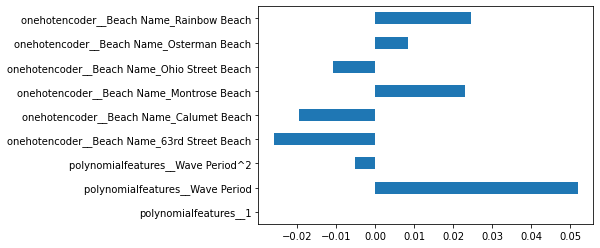

In [39]:
s = pd.Series(???, ???)
s.plot.???